In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [66]:
df = pd.read_csv('movies.dat',sep='::',names=['Movie_id','Title','Genres'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [67]:
df.head()

,Movie_id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
df1 = pd.read_csv('ratings.dat',sep='::',names=['User_id','Movie_id','Rating','timestamp'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [69]:
df1.head()

,User_id,Movie_id,Rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [70]:
df2 = pd.read_csv('users.dat',sep='::',names=['User_id','Gender','Age','Occupation','Zip_code'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [71]:
df2.head()

,User_id,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [72]:
data = pd.merge(df,df1,on='Movie_id')

In [73]:
data.head()

,Movie_id,Title,Genres,User_id,Rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [74]:
data = pd.merge(data,df2,on='User_id')

In [75]:
data.head()

,Movie_id,Title,Genres,User_id,Rating,timestamp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [76]:
Master_data = data.drop(['Genres','timestamp','Zip_code'],axis=1)

In [77]:
Master_data.isnull().sum()

Movie_id      0
Title         0
User_id       0
Rating        0
Gender        0
Age           0
Occupation    0
dtype: int64

In [78]:
Master_data.duplicated().value_counts()

False    1000209
dtype: int64

In [79]:
Master_data.shape

(1000209, 7)

In [80]:
Master_data.dtypes

Movie_id       int64
Title         object
User_id        int64
Rating         int64
Gender        object
Age            int64
Occupation     int64
dtype: object

In [81]:
Age_distribution = Master_data.Age.value_counts()
Age_distribution

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

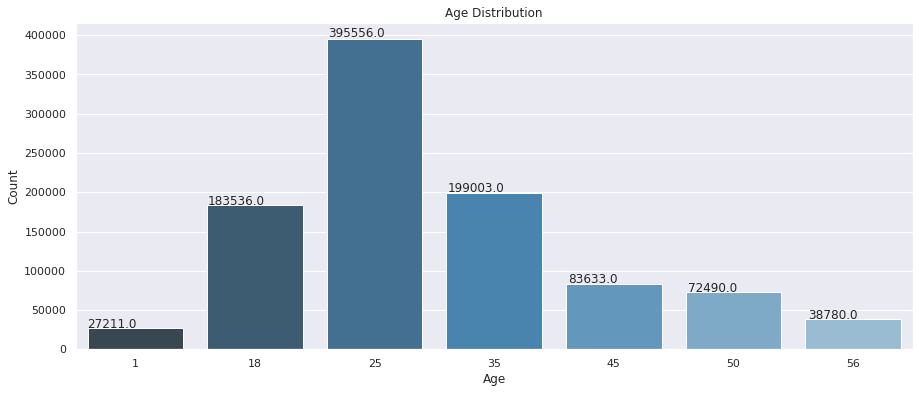

In [82]:
ax = sns.barplot(x=Age_distribution.index,y=Age_distribution.values,palette='Blues_d')
fig = plt.gcf();
fig.set_size_inches(15,6)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005));

Age Group of '25-34' contains the most user and less than 17 contains the least one.

In [83]:
Toy_story_ratings = Master_data[Master_data['Movie_id']==1]

In [84]:
Toy_story_ratings.head()

,Movie_id,Title,User_id,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
53,1,Toy Story (1995),6,4,F,50,9
124,1,Toy Story (1995),8,4,M,25,12
263,1,Toy Story (1995),9,5,M,25,17
369,1,Toy Story (1995),10,5,F,35,1


In [85]:
rating_count = Toy_story_ratings.Rating.value_counts()
rating_count

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

In [86]:
avg_rating = Toy_story_ratings.Rating.sum()/Toy_story_ratings.Rating.count()
avg_rating

4.146846413095811

Average Rating of the Movie Toy Story is 4.14.

In [87]:
Total_Ratings = Master_data.groupby(['Title'])['Rating'].count()
Total_Ratings[Total_Ratings>20]

Title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
                                    ... 
Your Friends and Neighbors (1998)    109
Zed & Two Noughts, A (1985)           29
Zero Effect (1998)                   301
Zeus and Roxanne (1997)               23
eXistenZ (1999)                      410
Name: Rating, Length: 3011, dtype: int64

In [88]:
Ratings_sum = Master_data.groupby(['Title'])['Rating'].sum()
Ratings_sum[Total_Ratings>20]

Title
$1,000,000 Duck (1971)                112
'Night Mother (1986)                  236
'Til There Was You (1997)             140
'burbs, The (1989)                    882
...And Justice for All (1979)         739
                                     ... 
Your Friends and Neighbors (1998)     368
Zed & Two Noughts, A (1985)            99
Zero Effect (1998)                   1129
Zeus and Roxanne (1997)                58
eXistenZ (1999)                      1335
Name: Rating, Length: 3011, dtype: int64

In [89]:
Movie_Rating = Ratings_sum[Total_Ratings>20]/Total_Ratings[Total_Ratings>20]

In [90]:
Movie_Rating

Title
$1,000,000 Duck (1971)               3.027027
'Night Mother (1986)                 3.371429
'Til There Was You (1997)            2.692308
'burbs, The (1989)                   2.910891
...And Justice for All (1979)        3.713568
                                       ...   
Your Friends and Neighbors (1998)    3.376147
Zed & Two Noughts, A (1985)          3.413793
Zero Effect (1998)                   3.750831
Zeus and Roxanne (1997)              2.521739
eXistenZ (1999)                      3.256098
Name: Rating, Length: 3011, dtype: float64

In [91]:
Movie_Rating.sort_values(ascending=False).head(25)

Title
Sanjuro (1962)                                                                 4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)            4.560510
Shawshank Redemption, The (1994)                                               4.554558
Godfather, The (1972)                                                          4.524966
Close Shave, A (1995)                                                          4.520548
Usual Suspects, The (1995)                                                     4.517106
Schindler's List (1993)                                                        4.510417
Wrong Trousers, The (1993)                                                     4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                  4.491489
Raiders of the Lost Ark (1981)                                                 4.477725
Rear Window (1954)                                                             4.476190
Paths of Glory (1957)     

List of Top 25 Movies by Viewership Rating with Ratings per movie is greater than 20.

In [92]:
User_2696_Rating = Master_data[Master_data['User_id']==2696]
User_2696_Rating

,Movie_id,Title,User_id,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",2696,3,M,25,7
991036,800,Lone Star (1996),2696,5,M,25,7
991037,1092,Basic Instinct (1992),2696,4,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7
991039,1258,"Shining, The (1980)",2696,4,M,25,7
991040,1270,Back to the Future (1985),2696,2,M,25,7
991041,1589,Cop Land (1997),2696,3,M,25,7
991042,1617,L.A. Confidential (1997),2696,4,M,25,7
991043,1625,"Game, The (1997)",2696,4,M,25,7
991044,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7


In [93]:
User_2696_Rating[['Movie_id','Title','Rating']]

,Movie_id,Title,Rating
991035,350,"Client, The (1994)",3
991036,800,Lone Star (1996),5
991037,1092,Basic Instinct (1992),4
991038,1097,E.T. the Extra-Terrestrial (1982),3
991039,1258,"Shining, The (1980)",4
991040,1270,Back to the Future (1985),2
991041,1589,Cop Land (1997),3
991042,1617,L.A. Confidential (1997),4
991043,1625,"Game, The (1997)",4
991044,1644,I Know What You Did Last Summer (1997),2


Ratings for all the movies rated by user with user_id=2696

In [94]:
Genre_data = data.drop(['timestamp','Zip_code'],axis=1)
Genre_data

,Movie_id,Title,Genres,User_id,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10
...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4


In [95]:
genre_list = []
Genre_array = Genre_data['Genres'].unique()  
Genre_array

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

In [96]:
for genre in Genre_array:
    x = genre.split(sep='|')
    for i in range(len(x)):
        if x[i] not in genre_list:
            genre_list.append(x[i])

In [97]:
genre_list

['Animation',
 "Children's",
 'Comedy',
 'Musical',
 'Romance',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Crime',
 'Thriller',
 'Western',
 'Horror',
 'Mystery',
 'Documentary',
 'Film-Noir']

Different Genres present in the list.

In [98]:
Genre = Genre_data['Genres']
Genre = Genre.str.get_dummies()
Genre

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [99]:
movie_rating_genre = pd.concat([Genre_data,Genre],axis=1)

In [100]:
movie_rating_genre.head()

,Movie_id,Title,Genres,User_id,Rating,Gender,Age,Occupation,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,0,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,1,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,0,0,...,0,0,0,0,0,0,0,0,1,0


In [101]:
movie_rating_genre.drop(['Genres','Title'],axis=1,inplace=True)

In [102]:
movie_rating_genre

,Movie_id,User_id,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,F,1,10,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,48,1,5,F,1,10,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,150,1,5,F,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,1,4,F,1,10,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,527,1,5,F,1,10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,5727,4,M,25,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,5727,2,M,25,4,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,5727,5,M,25,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,5727,3,M,25,4,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
movie_rating_genre.dtypes

Movie_id        int64
User_id         int64
Rating          int64
Gender         object
Age             int64
Occupation      int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [104]:
movie_rating_genre = pd.get_dummies(movie_rating_genre,columns=['Gender'])

In [105]:
movie_rating_genre

,Movie_id,User_id,Rating,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M
0,1,1,5,1,10,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,48,1,5,1,10,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,150,1,5,1,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,260,1,4,1,10,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,527,1,5,1,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,5727,4,25,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000205,3535,5727,2,25,4,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1000206,3536,5727,5,25,4,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1000207,3555,5727,3,25,4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [106]:
movie_rating_genre.dtypes

Movie_id       int64
User_id        int64
Rating         int64
Age            int64
Occupation     int64
Action         int64
Adventure      int64
Animation      int64
Children's     int64
Comedy         int64
Crime          int64
Documentary    int64
Drama          int64
Fantasy        int64
Film-Noir      int64
Horror         int64
Musical        int64
Mystery        int64
Romance        int64
Sci-Fi         int64
Thriller       int64
War            int64
Western        int64
Gender_F       uint8
Gender_M       uint8
dtype: object

In [ ]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(movie_rating_genre.corr(), annot = True, linewidths=1.5 , fmt = '.2f',ax=ax,cmap='YlGnBu')
plt.show()

From Heatmap we can see the correlation of Ratings with other columns

In [ ]:
movie_rating_genre.describe()

In [ ]:
Y = movie_rating_genre['Rating']

In [ ]:
X = movie_rating_genre.drop('Rating',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test,Y_test)

In [ ]:
Prediction_df = pd.DataFrame({'TEST':Y_test,'Predicted':Y_pred})

In [ ]:
Prediction_df.head()